In [11]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/diamonds_new.csv")
data

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [2]:
data.columns


Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [4]:
import matplotlib.pyplot as plt


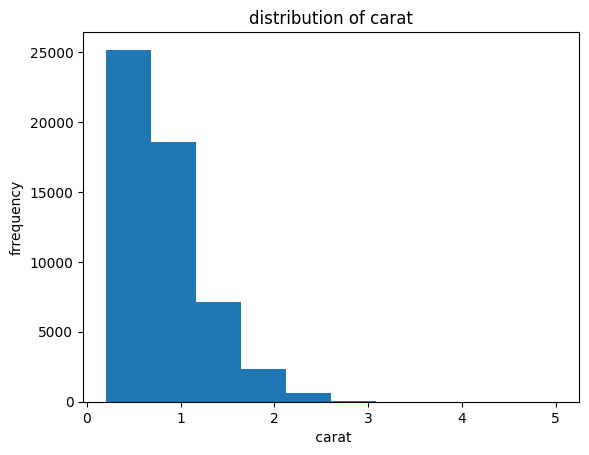

In [5]:
plt.hist(data['carat'])
plt.title("distribution of carat")
plt.xlabel(" carat")
plt.ylabel("frrequency")
plt.show()

In [6]:
data['carat'].describe()

count    53841.000000
mean         0.798120
std          0.474428
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [7]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [9]:
data.isna().sum() / data.shape[0] *100

carat        0.183537
cut          0.000000
color        0.103819
clarity      0.000000
table        0.116796
x            0.000000
y            0.000000
z            0.000000
price_new    0.000000
dtype: float64

 Handling Missing values in Carat

In [10]:
median_carat = data['carat'].median()
data['carat'] = data['carat'].fillna(median_carat)

In [11]:
data.isna().sum()

carat         0
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

## Handling missing values in color

In [16]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D', nan], dtype=object)

In [18]:
data['color'] = data['color'].fillna("H")

In [19]:
data.isna().sum()

carat         0
cut           0
color         0
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

## Handling missing values in Table

In [20]:
median_table = data['table'].median()
data['table'] = data['table'].fillna(median_table)

In [21]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

Outlier Detection

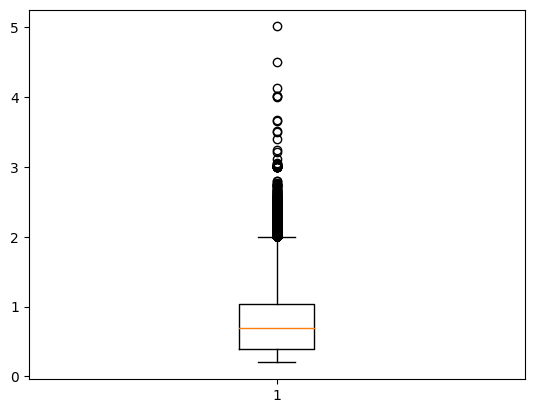

In [22]:
plt.boxplot(data['carat'])
plt.show();

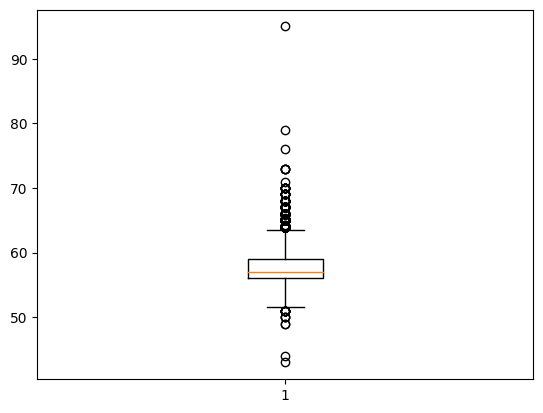

In [24]:
plt.boxplot(data['table'])
plt.show();

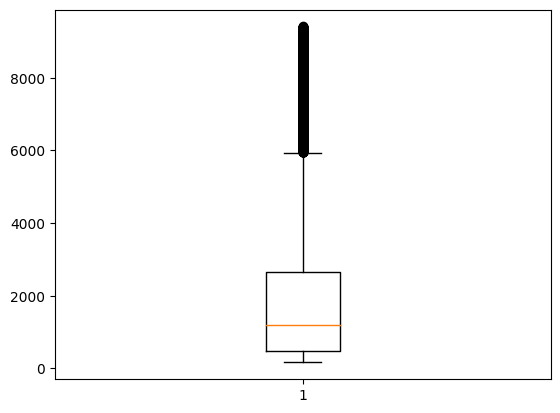

In [25]:
plt.boxplot(data['price_new'])
plt.show();

Scaling

In [13]:
x = data.drop("price_new", axis=1)
y = data['price_new']
x['carat'].unique()


array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58,  nan, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52,
       1.01, 0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04,
       0.93, 1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56,
       0.85, 0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88,
       0.5 , 1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69,
       0.4 , 1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11,
       1.1 , 1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39,
       1.44, 1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38,
       1.33, 1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62,
       1.57, 1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22,
       1.7 , 1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x["carat"] = le.fit_transform(x['carat'])



In [18]:
x = pd.get_dummies(x)